### V. Линейная Регрессия

#### V.A. Основная Идея и Уравнение

**Назначение:** Линейная регрессия — модель для предсказания **непрерывной** целевой переменной ($y$) на основе одного или нескольких признаков ($x$). Модель предполагает **линейную зависимость** между признаками и целью.

**Уравнение:**

*   **Простая Линейная Регрессия (1 признак):**
    $$y = w x + b$$
    *   $y$: Целевая переменная.
    *   $x$: Признак.
    *   $w$: Вес (наклон прямой) - показывает изменение $y$ при изменении $x$ на 1.
    *   $b$: Смещение (свободный член) - значение $y$ при $x=0$.

*   **Множественная Линейная Регрессия (n признаков):**
    $$y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b = \sum_{j=1}^{n} w_j x_j + b$$
    *   $x_j$: j-й признак.
    *   $w_j$: Вес j-го признака.

*   **Матричная форма (для m объектов и n признаков):**
    $$\hat{y} = X w + b$$
    *   $\hat{y}$: Вектор предсказанных значений (размер $m \times 1$).
    *   $X$: Матрица признаков (размер $m \times n$). Каждая строка - объект, каждый столбец - признак.
    *   $w$: Вектор весов (размер $n \times 1$).
    *   $b$: Смещение (скаляр, часто добавляется как фиктивный признак к $X$, или обрабатывается отдельно).
    *(Примечание: Иногда $b$ включают в вектор $w$, добавляя к $X$ столбец из единиц).*

**Задача:** Найти оптимальные параметры $w$ (вектор весов) и $b$ (смещение), чтобы модель наилучшим образом описывала данные.

#### V.B. Функция Ошибки: MSE (Mean Squared Error)

**Назначение:** Оценить, насколько хорошо модель (линия/гиперплоскость) описывает данные. Минимизация MSE — цель обучения.

**Формула:**
$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
*   $N$: Количество объектов.
*   $y_i$: Истинное значение для i-го объекта.
*   $\hat{y}_i$: Предсказанное значение для i-го объекта моделью ($w x_i + b$ или $X_i w + b$).
*   $(y_i - \hat{y}_i)$: Ошибка (остаток) для i-го объекта.

**Свойства:**
*   Штрафует за большие ошибки сильнее из-за возведения в квадрат.
*   Всегда неотрицательна (MSE ≥ 0).
*   Для линейной регрессии функция MSE является **выпуклой**, что гарантирует существование единственного глобального минимума.

#### V.C. Методы Обучения (Поиск Оптимальных Параметров)

**1. Метод Наименьших Квадратов (МНК / OLS - Ordinary Least Squares):**
*   **Тип:** Аналитический (точное решение).
*   **Идея:** Найти $w$ и $b$, минимизирующие сумму квадратов остатков $\sum (y_i - \hat{y}_i)^2$.
*   **Результат:** Существуют точные формулы для $w$ и $b$ (особенно простая для простой регрессии, для множественной используется матричная алгебра):
    *   **Простая ЛР:**
        $$w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$
        $$b = \bar{y} - w \bar{x}$$
    *   **Множественная ЛР (матричная форма):**
        $$w = (X^T X)^{-1} X^T y$$
        *(Требуется обратимость матрицы $X^T X$, что не всегда выполняется, например, при мультиколлинеарности).*
*   **Преимущества:** Точное, быстрое для небольшого/среднего числа признаков.
*   **Недостатки:** Вычислительно сложен (обращение матрицы) при очень большом числе признаков. Не применим для многих других моделей.

**2. Градиентный Спуск (Gradient Descent - GD):**
*   **Тип:** Итеративный (приближенное решение).
*   **Идея:** Постепенно изменять $w$ и $b$ в направлении **антиградиента** функции ошибки MSE, пока не будет достигнут минимум.
*   **Аналогия:** Спуск с горы в тумане, двигаясь в сторону самого крутого уклона вниз.
*   **Градиенты MSE:**
    *   По весу $w_j$: $\frac{\partial MSE}{\partial w_j} = \frac{2}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) x_{ij}$
    *   По смещению $b$: $\frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)$
    *   **Матричная форма:**
        $\nabla_w MSE = \frac{2}{N} X^T (\hat{y} - y)$
        $\nabla_b MSE = \frac{2}{N} \sum (\hat{y} - y)$
*   **Шаг обновления:**
    $w := w - \eta \nabla_w MSE$
    $b := b - \eta \nabla_b MSE$
    *   $\eta$ (`learning_rate`): Скорость обучения - размер шага. **Важный гиперпараметр!**
        *   Маленькая $\eta$: Медленная сходимость.
        *   Большая $\eta$: Может "перепрыгнуть" минимум, расходимость.
*   **Преимущества:** Универсален (применим ко многим моделям и функциям потерь), хорошо работает с большим числом признаков.
*   **Недостатки:** Требует выбора `learning_rate`, может сходиться медленнее МНК, может застрять в локальном минимуме (но не для MSE линейной регрессии).

**(Код для реализации GD, визуализации MSE и линии регрессии, а также использования `sklearn.linear_model.LinearRegression` и сравнения результатов остается как в исходном варианте, он хорошо иллюстрирует процесс).**

--- Данные для Множественной Линейной Регрессии ---
Форма матрицы признаков X: (100, 2)
Форма вектора цели y: (100,)
Первые 5 строк X:
 [[3.74540119 0.15714593]
 [9.50714306 3.18205206]
 [7.31993942 1.57177991]
 [5.98658484 2.54285346]
 [1.5601864  4.53783237]]
Первые 5 значений y: [12.81487841 25.41390259 21.99985761 15.48633512  7.18661619]
------------------------------

--- Параметры модели sklearn ---
sklearn w (coef_): [ 2.43165494 -0.91227544]
sklearn b (intercept_): 4.8212

MSE модели sklearn на обучающих данных: 3.7827

--- Сравнение с истинными параметрами (для сгенерированных данных) ---
Истинные w: [ 2.5 -1.2]
Истинный b: 5.0000
Обученные w (sklearn): [ 2.43165494 -0.91227544]
Обученный b (sklearn): 4.8212


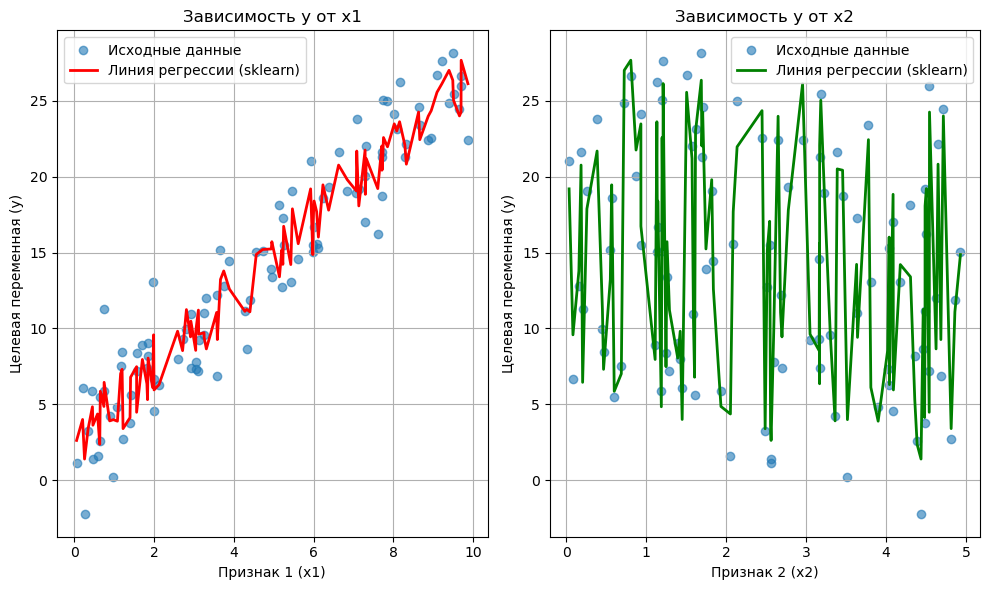

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error # Для расчета MSE
import matplotlib.pyplot as plt

# 1. Генерация синтетических данных для множественной линейной регрессии
#    (Возьмем пример из предыдущего раздела про Множественную ЛР)
num_samples = 100
np.random.seed(42) # Для воспроизводимости

# Истинные параметры (для генерации)
true_w = np.array([2.5, -1.2]) # Два веса для двух признаков
true_b = 5.0

# Генерируем два признака
x1 = np.random.rand(num_samples) * 10
x2 = np.random.rand(num_samples) * 5 # Сделаем второй признак в другом диапазоне

# Создаем матрицу признаков X (m x n = 100 x 2)
X = np.column_stack((x1, x2))

# Генерируем целевую переменную y с добавлением шума
noise = np.random.normal(0, 2, num_samples) # Гауссов шум
y = X @ true_w + true_b + noise # Используем матричное умножение @

print("--- Данные для Множественной Линейной Регрессии ---")
print("Форма матрицы признаков X:", X.shape)
print("Форма вектора цели y:", y.shape)
print("Первые 5 строк X:\n", X[:5])
print("Первые 5 значений y:", y[:5])
print("-" * 30)

# Важно: X уже является 2D массивом (100, 2),
# поэтому reshape не требуется для множественной регрессии.
# Если бы у нас был только один признак (простая ЛР), то понадобился бы reshape:
# x_simple = np.random.rand(num_samples) * 10
# y_simple = 3 * x_simple + 2 + np.random.normal(0, 1, num_samples)
# X_simple_reshaped = x_simple.reshape(-1, 1) # Нужно для fit()
# model.fit(X_simple_reshaped, y_simple)

# 2. Создание и обучение модели LinearRegression из sklearn
model = LinearRegression() # Создаем экземпляр модели
model.fit(X, y)            # Обучаем модель на данных X и y

# 3. Получение обученных параметров
sklearn_w = model.coef_      # Обученные веса (коэффициенты), будет массивом [w1, w2]
sklearn_b = model.intercept_ # Обученное смещение (свободный член)

print("\n--- Параметры модели sklearn ---")
print(f'sklearn w (coef_): {sklearn_w}')
print(f'sklearn b (intercept_): {sklearn_b:.4f}') # Выводим с 4 знаками

# 4. Предсказание на обучающих данных (для примера)
y_pred_sklearn = model.predict(X)

# 5. Оценка качества (MSE)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"\nMSE модели sklearn на обучающих данных: {mse_sklearn:.4f}")

# 6. Сравнение с истинными параметрами (если они известны, как в нашем случае)
print("\n--- Сравнение с истинными параметрами (для сгенерированных данных) ---")
print(f"Истинные w: {true_w}")
print(f"Истинный b: {true_b:.4f}")
print(f"Обученные w (sklearn): {sklearn_w}")
print(f"Обученный b (sklearn): {sklearn_b:.4f}")
# Обученные параметры должны быть близки к истинным, но не идентичны из-за шума в данных

# 7. Визуализация (только если признаков 1 или 2)
#    Для 2 признаков можно построить 3D график или отдельные графики зависимости
#    y от каждого признака с линией регрессии (упрощенно).
#    Построим для первого признака:
if X.shape[1] == 2: # Проверяем, что у нас 2 признака
    plt.figure(figsize=(10, 6))

    # График зависимости y от x1
    plt.subplot(1, 2, 1) # 1 строка, 2 столбца, 1-й график
    plt.scatter(X[:, 0], y, alpha=0.6, label='Исходные данные')
    # Линия регрессии для x1 (упрощенно, держа x2 средним, или просто проекция)
    # Для простоты построим линию по предсказаниям
    # Сортируем по x1 для красивой линии
    sort_indices = np.argsort(X[:, 0])
    plt.plot(X[sort_indices, 0], y_pred_sklearn[sort_indices], color='red', linewidth=2, label='Линия регрессии (sklearn)')
    plt.xlabel('Признак 1 (x1)')
    plt.ylabel('Целевая переменная (y)')
    plt.title('Зависимость y от x1')
    plt.legend()
    plt.grid(True)

    # График зависимости y от x2
    plt.subplot(1, 2, 2) # 1 строка, 2 столбца, 2-й график
    plt.scatter(X[:, 1], y, alpha=0.6, label='Исходные данные')
    # Линия регрессии для x2
    sort_indices = np.argsort(X[:, 1])
    plt.plot(X[sort_indices, 1], y_pred_sklearn[sort_indices], color='green', linewidth=2, label='Линия регрессии (sklearn)')
    plt.xlabel('Признак 2 (x2)')
    plt.ylabel('Целевая переменная (y)')
    plt.title('Зависимость y от x2')
    plt.legend()
    plt.grid(True)

    plt.tight_layout() # Чтобы графики не накладывались
    plt.show()

---

#### V.D. Регуляризация Линейной Регрессии

**Проблема:** Переобучение (Overfitting) - модель слишком хорошо подстраивается под обучающие данные (включая шум) и плохо обобщает на новые. В линейных моделях часто проявляется в **слишком больших значениях весов `w`**.

**Регуляризация:** Методы добавления **штрафа** к функции ошибки за большие веса, заставляя модель быть "проще" и устойчивее.

**1. L2-Регуляризация (Ridge / Гребневая регрессия):**
*   **Штраф:** Сумма **квадратов** весов: $\lambda \sum w_j^2$.
*   **Функция ошибки:** $J_{Ridge} = MSE + \lambda ||w||_2^2 = \frac{1}{N} \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2$.
*   $\lambda$ (`alpha` в sklearn): Коэффициент регуляризации (гиперпараметр). $\lambda \ge 0$.
    *   $\lambda=0$: Обычная ЛР.
    *   $\lambda \to \infty$: Все $w_j \to 0$.
*   **Эффект:** "Стягивает" веса к нулю, но **не обнуляет** их полностью. Уменьшает влияние всех признаков, особенно коррелированных. Уменьшает дисперсию (variance).

**2. L1-Регуляризация (Lasso / Лассо):**
*   **Штраф:** Сумма **модулей** весов: $\lambda \sum |w_j|$.
*   **Функция ошибки:** $J_{Lasso} = MSE + \lambda ||w||_1 = \frac{1}{N} \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_j|$.
*   $\lambda$ (`alpha` в sklearn): Коэффициент регуляризации.
*   **Эффект:** Может **обнулять** некоторые веса полностью. Выполняет **автоматический отбор признаков**. Делает модель разреженной (sparse). Также уменьшает дисперсию.

**3. Elastic Net:**
*   **Штраф:** Комбинация L1 и L2 штрафов.
*   **Функция ошибки:** $J_{ElasticNet} = MSE + \lambda_1 ||w||_1 + \lambda_2 ||w||_2^2$.
*   Сочетает преимущества Lasso (отбор признаков) и Ridge (стабильность при коррелированных признаках).

**Выбор типа и силы регуляризации (`alpha`/`lambda`):** Обычно с помощью **кросс-валидации**.

**(Код для использования `Ridge` и `Lasso` из `sklearn` и сравнения весов остается как в исходном варианте).**

--- Данные для Регуляризации ---
Форма матрицы признаков X: (100, 5)
Форма вектора цели y: (100,)
------------------------------

--- Обычная Линейная Регрессия ---
Веса (w): [ 2.45 -1.28  0.89 -0.09 -0.05]
Смещение (b): 5.47
MSE на обучении: 4.50
------------------------------

--- Ridge Регрессия (L2) ---

Alpha = 0.01:
  Веса (w): [ 2.45 -1.28  0.89 -0.09 -0.05]
  Смещение (b): 5.47
  MSE на обучении: 4.50

Alpha = 1.0:
  Веса (w): [ 2.44 -1.28  0.89 -0.09 -0.05]
  Смещение (b): 5.49
  MSE на обучении: 4.50

Alpha = 10.0:
  Веса (w): [ 2.42 -1.27  0.87 -0.09 -0.05]
  Смещение (b): 5.65
  MSE на обучении: 4.51

Alpha = 100.0:
  Веса (w): [ 2.18 -1.17  0.73 -0.08 -0.06]
  Смещение (b): 6.96
  MSE на обучении: 5.33
------------------------------

--- Lasso Регрессия (L1) ---

Alpha = 0.01:
  Веса (w): [ 2.45 -1.28  0.89 -0.09 -0.05]
  Смещение (b): 5.47
  MSE на обучении: 4.50

Alpha = 0.1:
  Веса (w): [ 2.43 -1.27  0.88 -0.08 -0.04]
  Смещение (b): 5.46
  MSE на обучении: 4.50

Alpha 

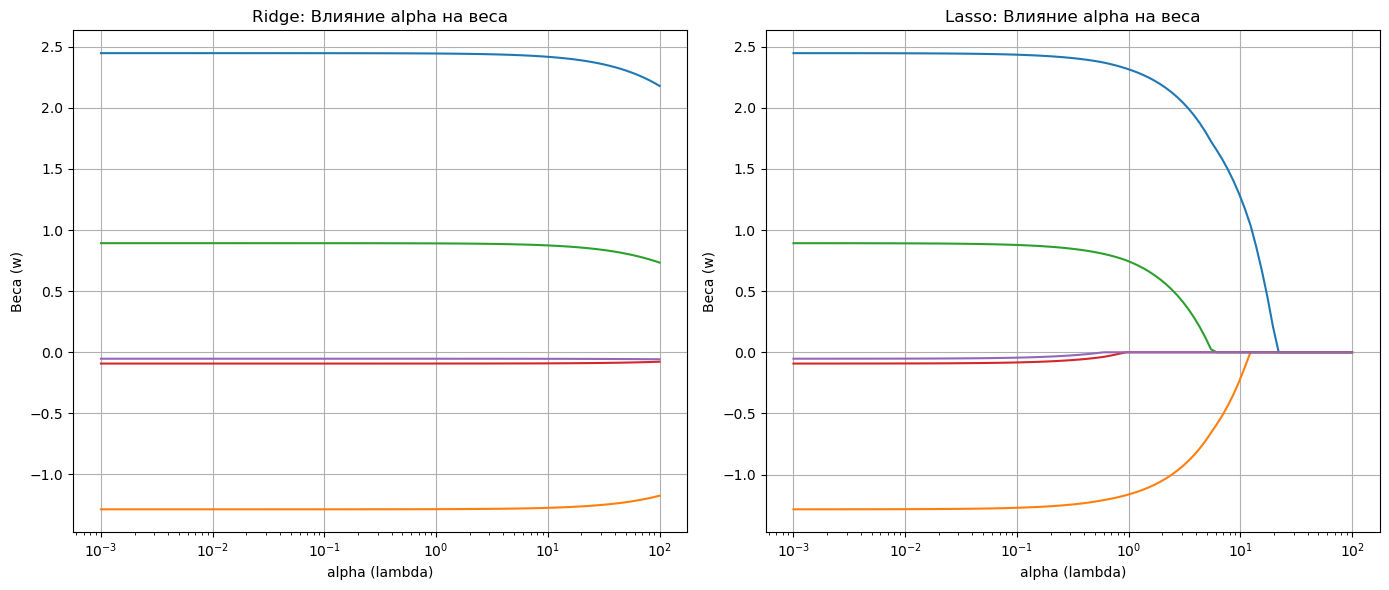

In [3]:
# 1. Генерация синтетических данных для множественной линейной регрессии
#    (Используем те же данные, что и для примера с LinearRegression)
num_samples = 100
np.random.seed(42) # Для воспроизводимости

# Истинные параметры (для генерации)
true_w = np.array([2.5, -1.2, 0.8, -0.1, 0.01]) # Добавим больше признаков, включая не очень важные
true_b = 5.0
num_features = len(true_w)

# Генерируем признаки
X = np.random.rand(num_samples, num_features) * 10 # Матрица 100 x 5

# Генерируем целевую переменную y с добавлением шума
noise = np.random.normal(0, 2, num_samples) # Гауссов шум
y = X @ true_w + true_b + noise # Используем матричное умножение @

print("--- Данные для Регуляризации ---")
print("Форма матрицы признаков X:", X.shape)
print("Форма вектора цели y:", y.shape)
print("-" * 30)

# --- Сначала обучим обычную Линейную Регрессию для сравнения ---
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_w = lr_model.coef_
lr_b = lr_model.intercept_
lr_mse = mean_squared_error(y, lr_model.predict(X))

print("\n--- Обычная Линейная Регрессия ---")
print(f"Веса (w): {np.round(lr_w, 2)}") # Округлим для читаемости
print(f"Смещение (b): {lr_b:.2f}")
print(f"MSE на обучении: {lr_mse:.2f}")
print("-" * 30)


# --- 2. L2-регуляризация (Ridge Regression) ---
# Попробуем разные значения alpha
alphas_ridge = [0.01, 1.0, 10.0, 100.0]

print("\n--- Ridge Регрессия (L2) ---")
for alpha_val in alphas_ridge:
    ridge_model = Ridge(alpha=alpha_val) # alpha - коэффициент регуляризации (λ)
    ridge_model.fit(X, y)                # Обучаем Ridge-модель

    ridge_w = ridge_model.coef_          # Получаем веса
    ridge_b = ridge_model.intercept_     # Получаем смещение
    ridge_mse = mean_squared_error(y, ridge_model.predict(X)) # Оцениваем MSE

    print(f"\nAlpha = {alpha_val}:")
    print(f"  Веса (w): {np.round(ridge_w, 2)}")
    print(f"  Смещение (b): {ridge_b:.2f}")
    print(f"  MSE на обучении: {ridge_mse:.2f}")
    # Обратите внимание, как веса уменьшаются по модулю с ростом alpha

print("-" * 30)


# --- 3. L1-регуляризация (Lasso Regression) ---
# Попробуем разные значения alpha (для Lasso часто нужны меньшие alpha)
alphas_lasso = [0.01, 0.1, 1.0, 5.0]

print("\n--- Lasso Регрессия (L1) ---")
for alpha_val in alphas_lasso:
    lasso_model = Lasso(alpha=alpha_val, max_iter=10000) # alpha = lambda. Увеличим max_iter для сходимости
    lasso_model.fit(X, y)                  # Обучаем Lasso-модель

    lasso_w = lasso_model.coef_            # Получаем веса
    lasso_b = lasso_model.intercept_       # Получаем смещение
    lasso_mse = mean_squared_error(y, lasso_model.predict(X)) # Оцениваем MSE

    print(f"\nAlpha = {alpha_val}:")
    print(f"  Веса (w): {np.round(lasso_w, 2)}") # Веса могут обнуляться!
    print(f"  Смещение (b): {lasso_b:.2f}")
    print(f"  MSE на обучении: {lasso_mse:.2f}")
    # Обратите внимание, как некоторые веса становятся равными нулю при увеличении alpha

print("-" * 30)

# --- Визуализация влияния alpha на веса (опционально) ---
coefs_ridge = []
coefs_lasso = []
alphas = np.logspace(-3, 2, 100) # Диапазон alpha от 0.001 до 100

for a in alphas:
    ridge = Ridge(alpha=a).fit(X, y)
    coefs_ridge.append(ridge.coef_)
    lasso = Lasso(alpha=a, max_iter=10000).fit(X, y)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.plot(alphas, coefs_ridge)
plt.xscale('log')
plt.xlabel('alpha (lambda)')
plt.ylabel('Веса (w)')
plt.title('Ridge: Влияние alpha на веса')
plt.grid(True)

plt.subplot(122)
plt.plot(alphas, coefs_lasso)
plt.xscale('log')
plt.xlabel('alpha (lambda)')
plt.ylabel('Веса (w)')
plt.title('Lasso: Влияние alpha на веса')
plt.grid(True)

plt.tight_layout()
plt.show()

#### V.E. Компромисс Смещения и Дисперсии (Bias-Variance Tradeoff) и Регуляризация

*   **Смещение (Bias):** Ошибка из-за упрощающих предположений модели (недообучение).
*   **Дисперсия (Variance):** Ошибка из-за чувствительности модели к шуму в обучающих данных (переобучение).

**Регуляризация в основном борется с высокой дисперсией (переобучением):**
*   Штрафуя большие веса, она **упрощает** модель.
*   Упрощенная модель **менее чувствительна** к шуму в обучении.
*   **НО:** Чрезмерная регуляризация (слишком большое $\lambda$) может **увеличить смещение**, сделав модель слишком простой (недообучение).

**Цель:** Найти $\lambda$, обеспечивающую оптимальный баланс между смещением и дисперсией для минимизации ошибки на новых данных.

---